In [12]:
import os
import sys
import librosa
import librosa.display

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../")

from helpers.split import label_strings, tag_label_feature_split

In [2]:
file = os.path.join(Path().absolute().parents[1], 'datasets', 'melspectrogram_base_genres_100.pickle.bz2')
df = pd.read_pickle(file)

In [3]:
df.head()

,metadata_path,melspectrogram,genre_label
0,79/1107579.mp3,"[[-90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -9...",genre_blues
0,00/1289300.mp3,"[[-78.266624, -62.70582, -39.31391, -28.755621...",genre_blues
0,76/1310776.mp3,"[[-25.845741, -9.64709, -8.605388, -15.772289,...",genre_blues
0,01/1403901.mp3,"[[-90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -9...",genre_blues
0,57/499057.mp3,"[[-90.0, -90.0, -68.24053, -26.205925, -29.883...",genre_blues


In [18]:
melspec_sample = np.array(df.iloc[0]['melspectrogram'])
print(melspec_sample.shape)
print(melspec_sample)

(96, 3840)
[[-90. -90. -90. ... -90. -90. -90.]
 [-90. -90. -90. ... -90. -90. -90.]
 [-90. -90. -90. ... -90. -90. -90.]
 ...
 [-90. -90. -90. ... -90. -90. -90.]
 [-90. -90. -90. ... -90. -90. -90.]
 [-90. -90. -90. ... -90. -90. -90.]]


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

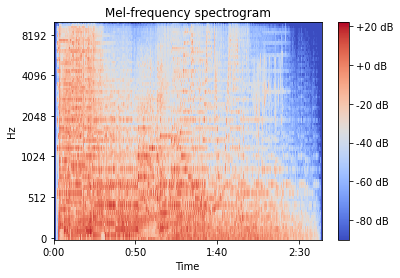

In [19]:
fig, ax = plt.subplots()
img = librosa.display.specshow(melspec_sample, x_axis='time',
                         y_axis='mel', sr=12000,
                         fmax=10000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

To create center cropped melspec for 29.1 sec

In [20]:
def crop_center(melspec,cropx,cropy):
    y,x = melspec.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return melspec[starty:starty+cropy,startx:startx+cropx]

In [26]:
melspec_sample_cropped = crop_center(melspec_sample, 683, 96)
print(melspec_sample_cropped.shape)

(96, 683)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

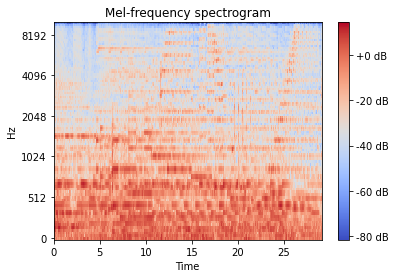

In [27]:
fig, ax = plt.subplots()
img = librosa.display.specshow(melspec_sample_cropped, x_axis='time',
                         y_axis='mel', sr=12000,
                         fmax=10000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

The spectrum from melspectorgram

In [28]:
signal = librosa.db_to_amplitude(melspec_sample)
signal

array([[3.1622778e-05, 3.1622778e-05, 3.1622778e-05, ..., 3.1622778e-05,
        3.1622778e-05, 3.1622778e-05],
       [3.1622778e-05, 3.1622778e-05, 3.1622778e-05, ..., 3.1622778e-05,
        3.1622778e-05, 3.1622778e-05],
       [3.1622778e-05, 3.1622778e-05, 3.1622778e-05, ..., 3.1622778e-05,
        3.1622778e-05, 3.1622778e-05],
       ...,
       [3.1622778e-05, 3.1622778e-05, 3.1622778e-05, ..., 3.1622778e-05,
        3.1622778e-05, 3.1622778e-05],
       [3.1622778e-05, 3.1622778e-05, 3.1622778e-05, ..., 3.1622778e-05,
        3.1622778e-05, 3.1622778e-05],
       [3.1622778e-05, 3.1622778e-05, 3.1622778e-05, ..., 3.1622778e-05,
        3.1622778e-05, 3.1622778e-05]], dtype=float32)

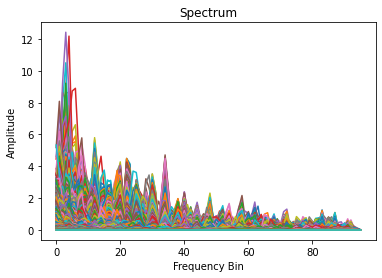

In [32]:
plt.plot(signal)
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

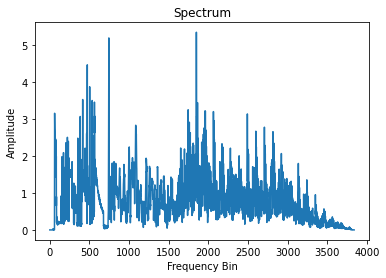

In [33]:
plt.plot(signal[0])
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

transform melspectorgram back to signal

In [34]:
S = librosa.feature.inverse.mel_to_stft(melspec_sample)
y = librosa.griffinlim(S)

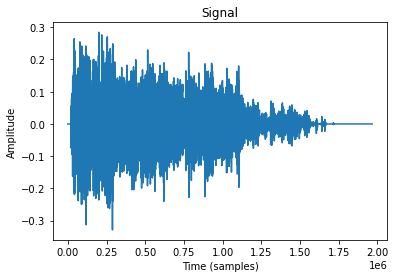

In [35]:
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');